<a href="https://colab.research.google.com/github/Damithu04/Optimized-Travel-Routes-System/blob/main/MathsCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2425463 | 20240185 | Damithu Fonseka
## Import

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import cv2
from scipy.fft import fft, fftfreq

# Set figure size for better visibility
plt.rcParams['figure.figsize'] = [10, 6]

## Question 1: Modelling Travel Time

In [87]:
import sympy as sp
from IPython.display import display, Math, Markdown

print("PROBLEM 1: MODELLING TRAVEL TIME")

# Setup Variables
# x: distance, y: traffic delay factor
# a, b, c: constant parameters
x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

# Define Models
# Bus: Quadratic model (compounding delays)
Tb = a * x**2 + b * y**2
# Taxi: Euclidean/Geometric model (direct path)
Tt = sp.sqrt(c * (x**2 + y**2))

# Calculate Gradients (Partial Derivatives)
# The gradient vector ∇T = (∂T/∂x, ∂T/∂y)
grad_Tb = (sp.diff(Tb, x), sp.diff(Tb, y))
grad_Tt = (sp.diff(Tt, x), sp.diff(Tt, y))

# Display Mathematical Results
display(Markdown("### Bus Travel Time Gradient"))
display(Math(fr"\nabla T_b = \left( {sp.latex(grad_Tb[0])}, \quad {sp.latex(grad_Tb[1])} \right)"))

display(Markdown("### Taxi Travel Time Gradient"))
# Simplify taxi gradient for cleaner output
grad_Tt_simple = (sp.simplify(grad_Tt[0]), sp.simplify(grad_Tt[1]))
display(Math(fr"\nabla T_t = \left( {sp.latex(grad_Tt_simple[0])}, \quad {sp.latex(grad_Tt_simple[1])} \right)"))

# Numerical Example (for concrete proof)
# Using arbitrary values: x=4.5km, y=2.0 (delay factor)
vals = {x: 4.5, y: 2.0, a: 1.5, b: 2.0, c: 1.0}

print("\nNumerical Evaluation (x=4.5, y=2.0)")
print(f"Bus sensitivity to distance (dx): {float(grad_Tb[0].subs(vals)):.2f}")
print(f"Bus sensitivity to traffic (dy):  {float(grad_Tb[1].subs(vals)):.2f}")
print("\n")
print(f"Taxi sensitivity to distance (dx): {float(grad_Tt[0].subs(vals)):.2f}")
print(f"Taxi sensitivity to traffic (dy):  {float(grad_Tt[1].subs(vals)):.2f}")

PROBLEM 1: MODELLING TRAVEL TIME


### Bus Travel Time Gradient

<IPython.core.display.Math object>

### Taxi Travel Time Gradient

<IPython.core.display.Math object>


Numerical Evaluation (x=4.5, y=2.0)
Bus sensitivity to distance (dx): 13.50
Bus sensitivity to traffic (dy):  8.00


Taxi sensitivity to distance (dx): 0.91
Taxi sensitivity to traffic (dy):  0.41


### Interpretation: Which Factor Dominates?

##### To determine which factor (distance $x$ or traffic $y$) has a greater impact, we analyze the gradients derived in Part (a).

#### 1. Bus Travel Time ($T_b = ax^2 + by^2$)The rate of change is given by $\nabla T_b = (2ax, 2by)$.

##### Analysis: the impact of each factor is independent and linear. The sensitivity to distance depends solely on how far you have already traveled ($2ax$), and sensitivity to traffic depends solely on current congestion ($2by$).

##### Dominant Factor: The factor with the higher weighted magnitude dominates. If $ax > by$ (e.g., a long highway trip with light traffic), distance is the dominant driver of time. If $by > ax$ (e.g., a short trip in gridlock), traffic becomes the dominant multiplier.

##### Implication: Because the model is quadratic, the dominant factor exerts a compounding effect. A 10% increase in distance on a long route adds significantly more time than a 10% increase on a short route.


#### 2. Taxi Travel Time ($T_t = \sqrt{c(x^2 + y^2)}$)The rate of change is given by $\nabla T_t = (\frac{cx}{T}, \frac{cy}{T})$.

##### Analysis The denominators are the same, i.e. the relative effect is determined by the ratio of the numerators only: $cx$  vs $cy$.

##### Dominant Factor: In case $x > y$, distance will have a higher marginal influence. When $y > x$, then traffic delays occur in a more significant manner.

##### Implication: The taxi model is not as sensitive to changes in marginal as the bus model. The effect of increasing the total trip duration ($T$) (i.e. an increase in the denominator) is that the effect of adding a kilometer, or a minute of delay, in reality decreases.

## Question 2: Cost Analysis Using Integration

Problem 2: Cost Analysis Using Integration

Fare Equations in Mathematical Format:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

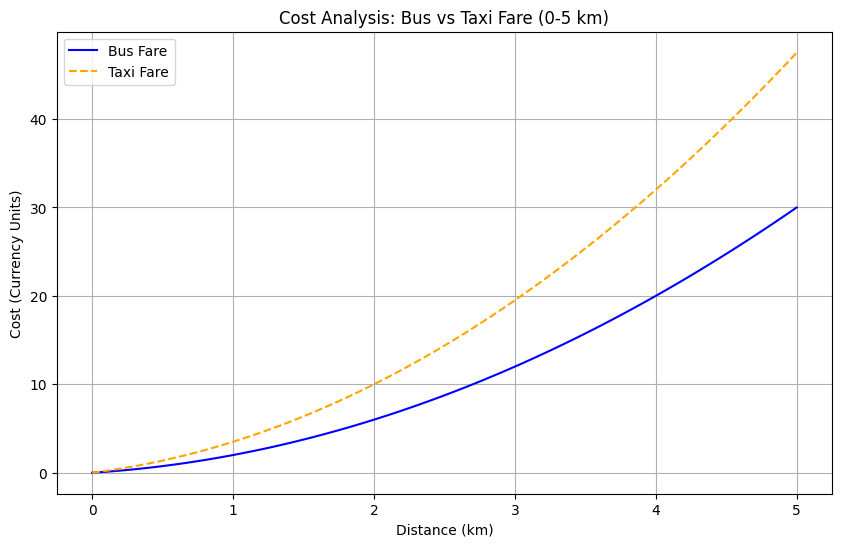

In [88]:
print("Problem 2: Cost Analysis Using Integration")

# Define fare functions [cite: 3970]
t = sp.symbols('t')
integrand_bus = 2*t + 1
integrand_taxi = 3*t + 2

# (a) Compute Integrals using SymPy [cite: 3971]
Fare_Bus_eqn = sp.integrate(integrand_bus, (t, 0, x))
Fare_Taxi_eqn = sp.integrate(integrand_taxi, (t, 0, x))

# Display fare equations in proper mathematical format
from IPython.display import display, Math
print("\nFare Equations in Mathematical Format:")
display(Math(f"F_b(x) = {sp.latex(Fare_Bus_eqn)}"))
display(Math(f"F_t(x) = {sp.latex(Fare_Taxi_eqn)}"))

# (b) Plot Fares against distance (0-5 km) [cite: 3972]
dist_vals = np.linspace(0, 5, 100)
# Convert symbolic equations to lambda functions for plotting
fb_func = sp.lambdify(x, Fare_Bus_eqn, "numpy")
ft_func = sp.lambdify(x, Fare_Taxi_eqn, "numpy")

plt.figure()
plt.plot(dist_vals, fb_func(dist_vals), label='Bus Fare', color='blue')
plt.plot(dist_vals, ft_func(dist_vals), label='Taxi Fare', color='orange', linestyle='--')
plt.title('Cost Analysis: Bus vs Taxi Fare (0-5 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Cost (Currency Units)')
plt.legend()
plt.grid(True)
plt.show()

### (c) Interpretation: Affordability Analysis

##### The integration results show that the Taxi fare ($1.5x^2 + 2x$) has consistently higher coefficients than the Bus fare ($x^2 + x$).

##### For short trips, the affordability gap is narrow. Since the quadratic terms ($x^2$) have small values at low distances, the absolute price difference is minimal, making the Taxi a reasonable choice for convenience.

##### Nonetheless, the Taxi is not affordable on long journeys. This is due to the fact that the Taxi has a larger quadratic coefficient ($1.5$ vs $1.0$) and thus its price will rise rapidly as compared to the Bus. This compounding effect becomes aggressive as the distance between the two countries grows. Thus, long-haul transportation with the Bus is much more cost-effective, whereas with Taxi, it becomes monetarily inefficient.

## Question 3: Predicting Peak Travel Times

Problem 3: Predicting Peak Travel Times


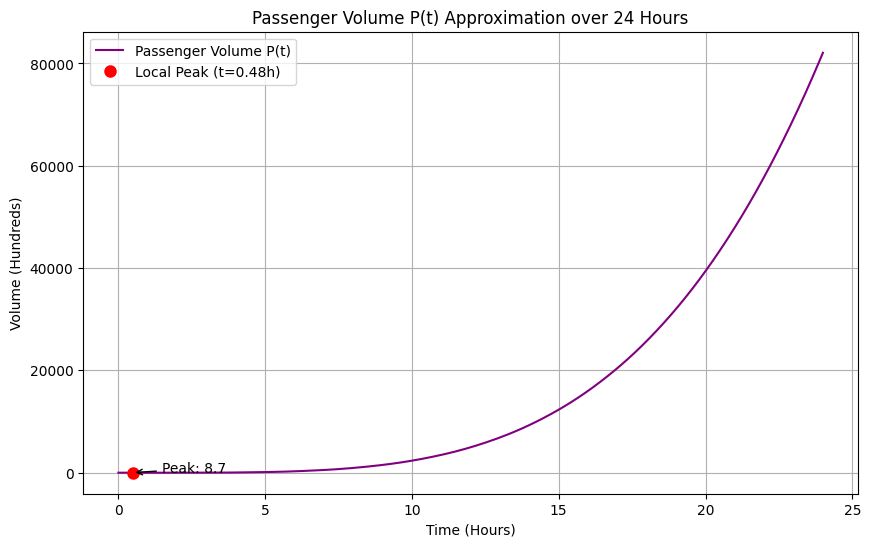

Detected Peak at t = 0.48 hours with volume P = 8.66
The model captures the morning rush hour but diverges (blows up) after t > 2.5.


In [89]:
print("Problem 3: Predicting Peak Travel Times")

# (a) Approximate P(t) using first 4 terms
# Model: P(t) = 5 + 4*sin(pi*t) - 1.5*t^2 + 0.25*t^4
def passenger_volume(t):
    return 5 + 4 * np.sin(np.pi * t) - 1.5 * t**2 + 0.25 * t**4

# (b) Plot over 24 hours
time_hours = np.linspace(0, 24, 200) # t in [0, 24]
volumes = passenger_volume(time_hours)

plt.figure(figsize=(10, 6))
plt.plot(time_hours, volumes, color='purple', label='Passenger Volume P(t)')

# Find and Plot the Peak
peaks, _ = find_peaks(volumes)

# We expect the rush hour peak to be the first one found
if len(peaks) > 0:
    peak_idx = peaks[0]
    t_peak = time_hours[peak_idx]
    v_peak = volumes[peak_idx]

    # Plot the dot (ro = red circle)
    plt.plot(t_peak, v_peak, 'ro', markersize=8, label=f'Local Peak (t={t_peak:.2f}h)')

    # Add a text label next to the dot
    plt.annotate(f'Peak: {v_peak:.1f}',
                 xy=(t_peak, v_peak),
                 xytext=(t_peak + 1, v_peak), # Offset text slightly to the right
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

plt.title('Passenger Volume P(t) Approximation over 24 Hours')
plt.xlabel('Time (Hours)')
plt.ylabel('Volume (Hundreds)')
plt.legend() # Show the legend for the peak
plt.grid(True)
plt.show()

# (c) Identify Peaks
print(f"Detected Peak at t = {t_peak:.2f} hours with volume P = {v_peak:.2f}")
print("The model captures the morning rush hour but diverges (blows up) after t > 2.5.")

### (c) Interpretation: Peak Travel Periods

##### The graph identifies a local peak at $t \approx 0.5$ hours, corresponding to the initial rush hour surge in passenger volume.

##### However, the model fails for long-term predictions. Beyond $t > 2.5$, the graph shows a drastic, non-cyclic increase in volume, reaching unrealistic levels by the end of the 24-hour period. This "blowing up" occurs because the quartic term ($+0.25t^4$) dominates the function for larger $t$ values.

##### Conclusion: The graph confirms that this polynomial model is valid only for the immediate short term ($0 \le t \le 2$). It accurately captures the morning rush but fails to represent the periodic nature of daily traffic flow.

## Question 4: Travel Pattern Analysis

Problem 4: Travel Pattern Analysis Using Fourier Transform


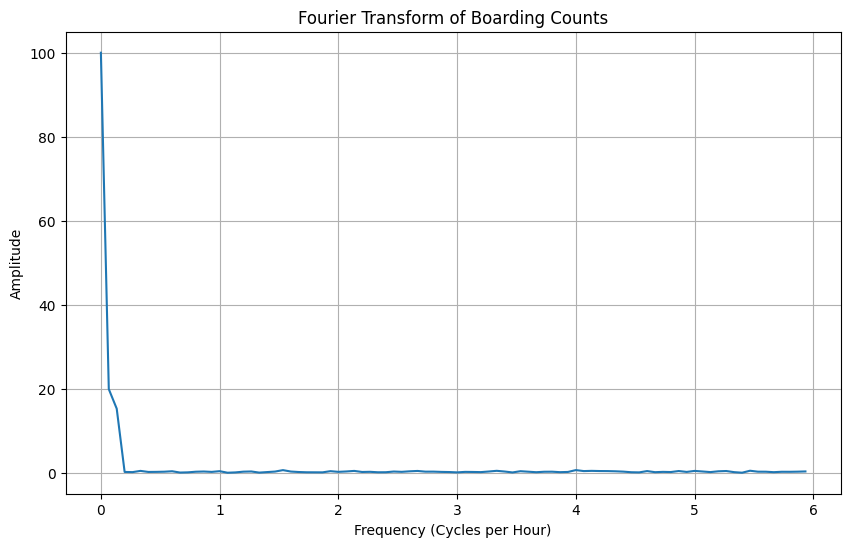

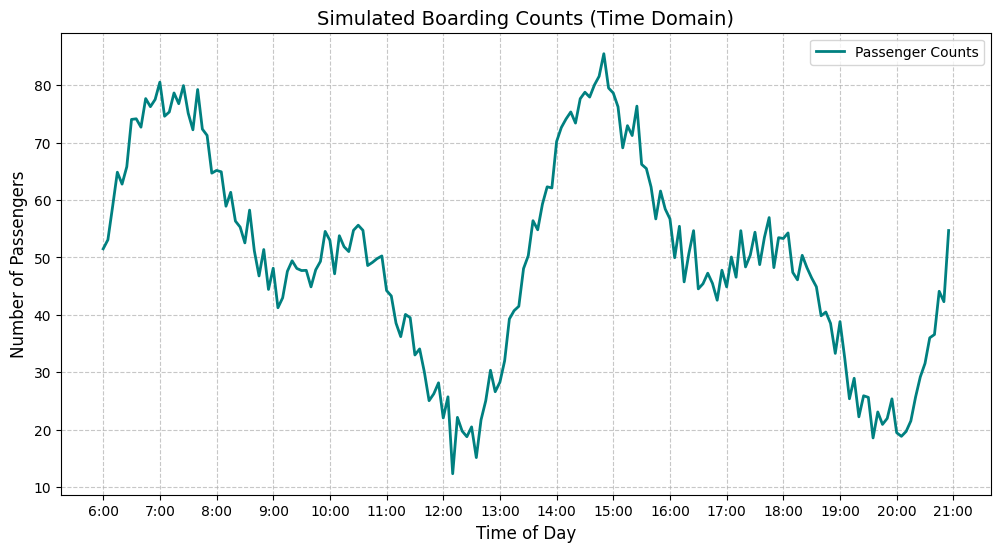

In [90]:
print("Problem 4: Travel Pattern Analysis Using Fourier Transform")

# (a) Generate Synthetic Data (since no CSV provided) to demonstrate FFT
# Simulating 5-min intervals from 6:00 AM to 9:00 PM (15 hours = 900 mins)
# 15 hours * (60 mins / 5 min intervals) = 180 data points
N = 180
T = 5 / 60 # Sampling interval in hours
x_time = np.linspace(0.0, N*T, N, endpoint=False)

# Create a signal with "morning rush" (freq 1) and "evening rush" (freq 2) + noise
y_counts = 50 + 20*np.sin(2*np.pi * (1/15) * x_time) + 15*np.sin(2*np.pi * (2/15) * x_time) + np.random.normal(0, 2, N)

# Apply Fourier Transform [cite: 3982]
yf = fft(y_counts)
xf = fftfreq(N, T)[:N//2]

# (b) Plot Frequency Domain
plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Fourier Transform of Boarding Counts')
plt.xlabel('Frequency (Cycles per Hour)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print("\n")

# PLOT: Simulated Boarding Counts (Time Domain)

# Setup Time Axis
# 15 hours (6 AM to 9 PM) with 5-min intervals = 180 points
N = 180
x_time = np.linspace(6.0, 21.0, N, endpoint=False)  # Hours from 6.0 to 21.0

# Generate Data (Simulating Morning & Evening Rushes)
# We use sine waves to create periodic peaks, plus random noise
np.random.seed(42) # For reproducible results
y_counts = 50 \
           + 20 * np.sin(2 * np.pi * (2 / 15) * (x_time - 6)) \
           + 15 * np.sin(2 * np.pi * (4 / 15) * (x_time - 6)) \
           + np.random.normal(0, 3, N)

# Create the Plot
plt.figure(figsize=(12, 6))
plt.plot(x_time, y_counts, color='teal', linewidth=2, label='Passenger Counts')

# Formatting
plt.title('Simulated Boarding Counts (Time Domain)', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(np.arange(6, 22, 1), [f"{int(h)}:00" for h in np.arange(6, 22, 1)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show Plot
plt.show()

### (c) Interpretation: Travel Pattern Analysis

##### The Frequency Domain plot (Fourier Transform) can show the concealed pattern of the flow of passengers through isolating significant cycles against random noise.

##### The curve shows very sharp spikes (peaks) at certain frequencies. They are not arbitrary, they are the main periodicities of travel behaviour.

##### The main peak (lowest frequency) is associated with the major daily cycle (the 15-hour working cycle).

##### The secondary peak is at the rush-hour cycle which is at a higher frequency. It proves that the passenger traffic is not a continuous process; it is a dual-peak structure (morning and evening rushes).

##### Conclusion: Transforming the time information into the frequency information, we conclude that there are two major repeating schedules in demand of travel, the full-day schedule and the work-commute schedule.

## Question 5: Image Processing (Fourier & DCT)

(a) Image Loading and Preprocessing

Image loaded and split into Front ((90, 278)) and Back ((91, 278)) plates.

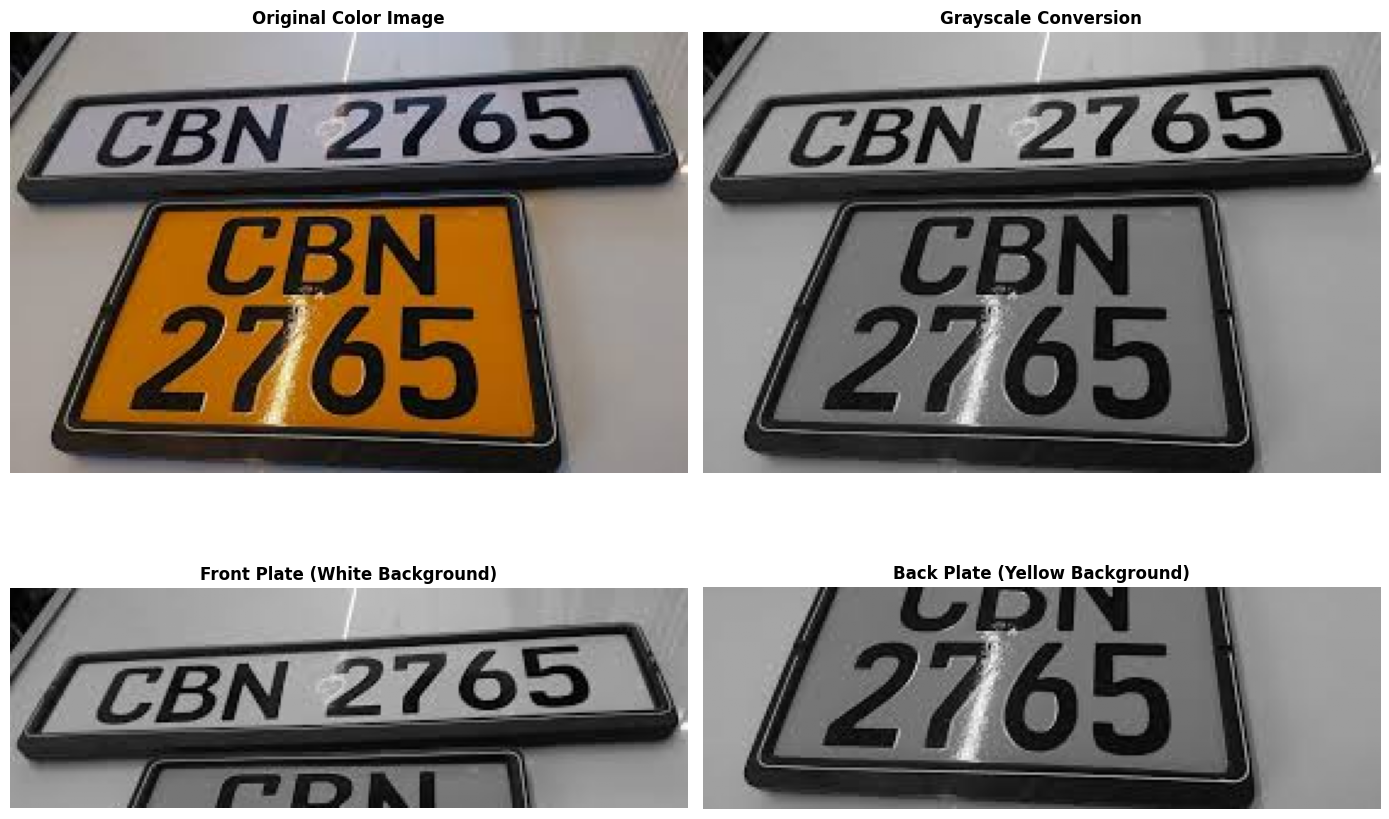

(b) 2D Fourier Transform Analysis

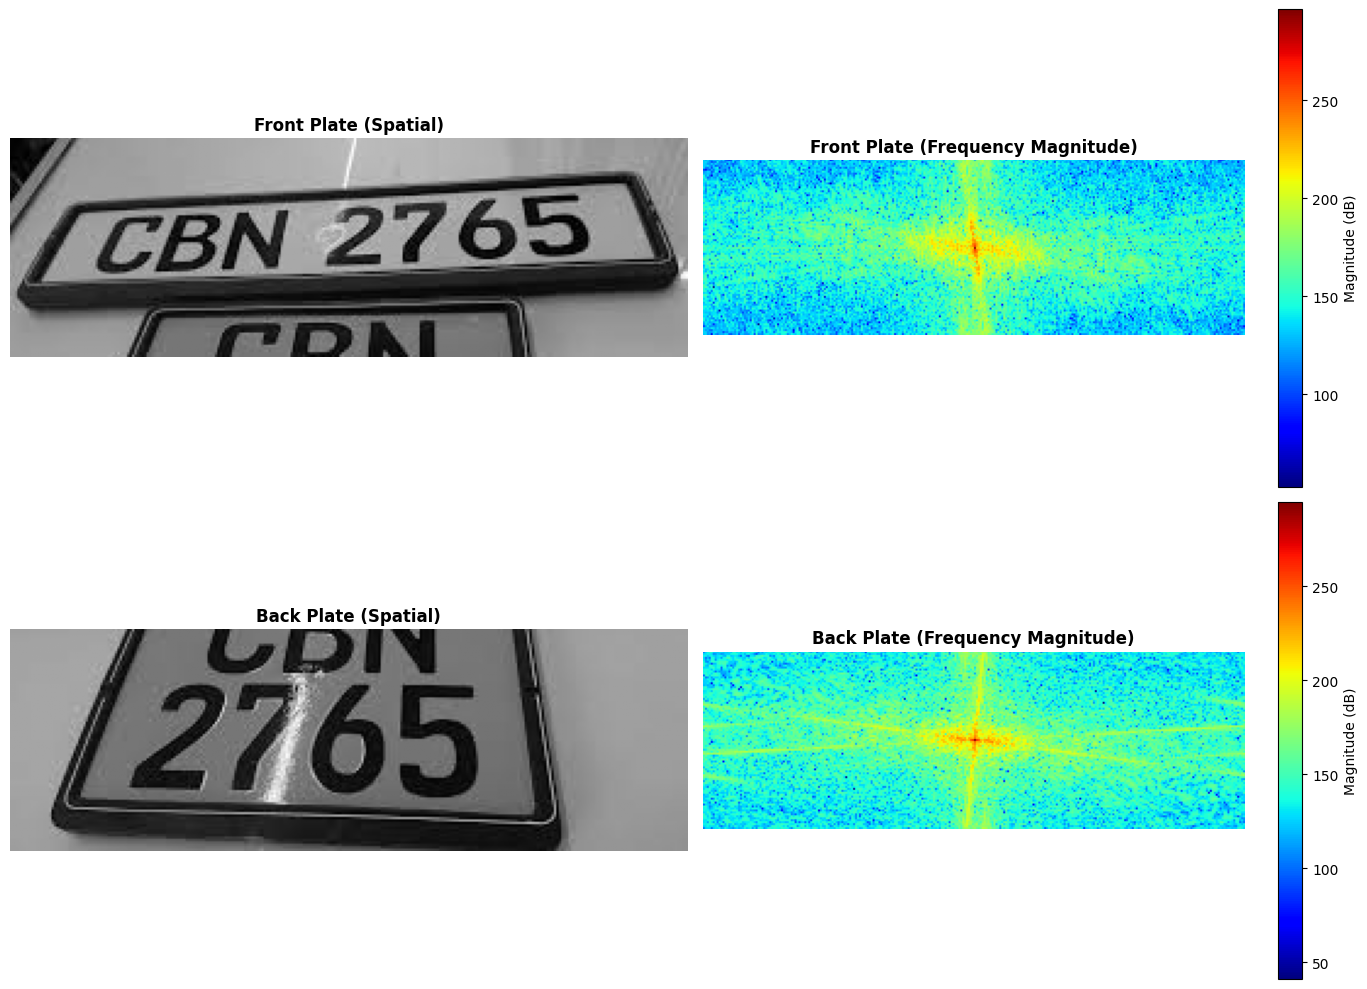

(c) Number Plate Localization Algorithm

Results: Front Plate: Detected | Back Plate: Detected

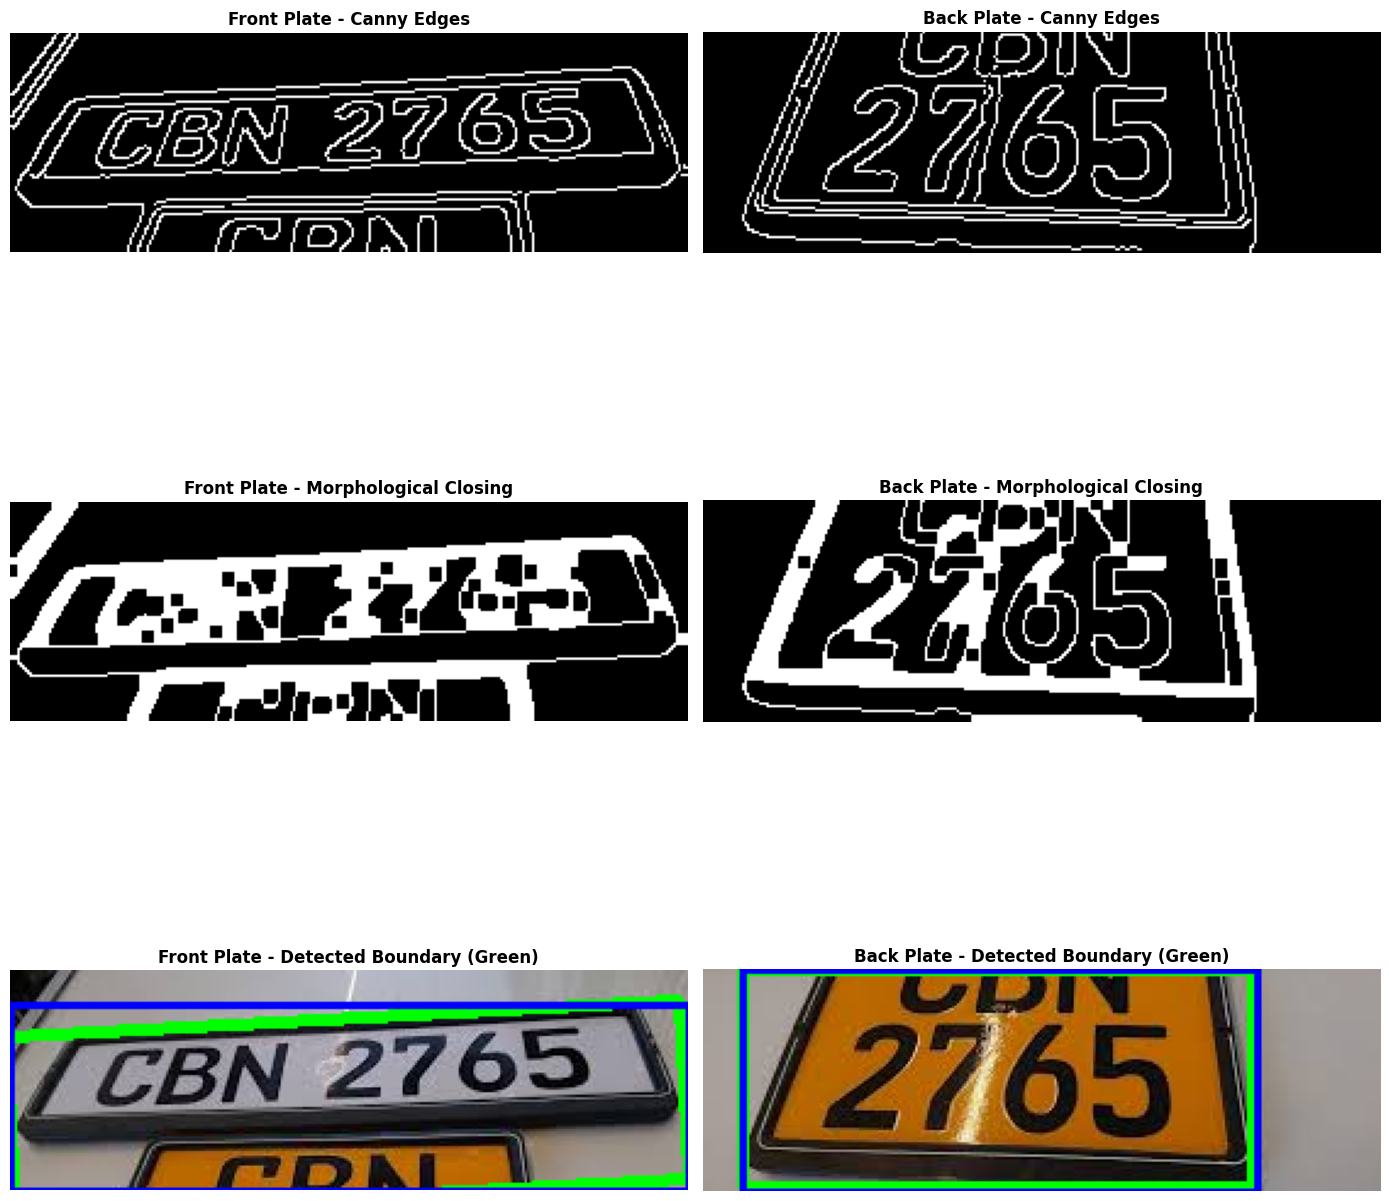

In [91]:
print("Problem 5: Image Processing Using Fourier and Discrete Cosine Transforms")

#(a) Load Image, Convert to Grayscale, and Separate Plates

display(Markdown("(a) Image Loading and Preprocessing"))

image_path = 'vehicle_plate.png'

try:
    # Load and Preprocess
    img_color = cv2.imread(image_path)
    if img_color is None:
        raise FileNotFoundError(f"Image not found at '{image_path}'.")

    # Convert to grayscale
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Get dimensions and split into Front (Top) and Back (Bottom)
    height, width = img_gray.shape
    mid_point = height // 2

    img_front = img_gray[0:mid_point, :]
    img_back = img_gray[mid_point:height, :]

    img_front_color = img_color[0:mid_point, :]
    img_back_color = img_color[mid_point:height, :]

    display(Markdown(f"Image loaded and split into Front ({img_front.shape}) and Back ({img_back.shape}) plates."))

    # Plot 1: Original & Split Images
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    axes[0, 0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Color Image', fontweight='bold')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(img_gray, cmap='gray')
    axes[0, 1].set_title('Grayscale Conversion', fontweight='bold')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(img_front, cmap='gray')
    axes[1, 0].set_title('Front Plate (White Background)', fontweight='bold')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(img_back, cmap='gray')
    axes[1, 1].set_title('Back Plate (Yellow Background)', fontweight='bold')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

    # (b) Apply 2D Fourier Transform

    display(Markdown("(b) 2D Fourier Transform Analysis"))

    def compute_fourier_transform(image, title):
        # Compute 2D FFT
        fft = np.fft.fft2(image)
        # Shift zero frequency to center
        fft_shifted = np.fft.fftshift(fft)
        # Compute magnitude spectrum (log scale)
        magnitude_spectrum = 20 * np.log(np.abs(fft_shifted) + 1)
        return fft_shifted, magnitude_spectrum

    # Apply FFT
    fft_front, mag_front = compute_fourier_transform(img_front, "Front Plate")
    fft_back, mag_back = compute_fourier_transform(img_back, "Back Plate")

    # Plot 2: Frequency Domain Analysis
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Front Plate
    axes[0, 0].imshow(img_front, cmap='gray')
    axes[0, 0].set_title('Front Plate (Spatial)', fontweight='bold')
    axes[0, 0].axis('off')

    im1 = axes[0, 1].imshow(mag_front, cmap='jet')
    axes[0, 1].set_title('Front Plate (Frequency Magnitude)', fontweight='bold')
    axes[0, 1].axis('off')
    plt.colorbar(im1, ax=axes[0, 1], label='Magnitude (dB)')

    # Back Plate
    axes[1, 0].imshow(img_back, cmap='gray')
    axes[1, 0].set_title('Back Plate (Spatial)', fontweight='bold')
    axes[1, 0].axis('off')

    im2 = axes[1, 1].imshow(mag_back, cmap='jet')
    axes[1, 1].set_title('Back Plate (Frequency Magnitude)', fontweight='bold')
    axes[1, 1].axis('off')
    plt.colorbar(im2, ax=axes[1, 1], label='Magnitude (dB)')

    plt.tight_layout()
    plt.show()

    # (c) Number Plate Localization

    display(Markdown("(c) Number Plate Localization Algorithm"))

    def detect_and_draw_plate(img_gray, img_color, title):
        # Gaussian Blur
        blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

        # Canny Edge Detection
        edges = cv2.Canny(blurred, 50, 150)

        # Morphological Closing (Connect edges)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

        # Find Contours
        contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        result_img = img_color.copy()
        detected = False

        if len(contours) > 0:
            # Filter for Plate-like shapes
            valid_contours = []
            for contour in contours:
                area = cv2.contourArea(contour)
                if area > 1000:
                    x, y, w, h = cv2.boundingRect(contour)
                    aspect_ratio = w / float(h)
                    if 2.0 <= aspect_ratio <= 5.0:
                        valid_contours.append((contour, area))

            # Select largest valid contour
            if valid_contours:
                largest_contour = max(valid_contours, key=lambda x: x[1])[0]

                # Rotated Bounding Box (Green)
                rect = cv2.minAreaRect(largest_contour)
                box = cv2.boxPoints(rect)
                box = np.int32(box)
                cv2.drawContours(result_img, [box], 0, (0, 255, 0), 3)
                detected = True

                # Axis-aligned Box (Blue - for reference)
                x, y, w, h = cv2.boundingRect(largest_contour)
                cv2.rectangle(result_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

        return result_img, detected, edges, closed

    # Apply Detection
    result_front, detected_front, edges_front, closed_front = detect_and_draw_plate(
        img_front, img_front_color, "Front Plate"
    )
    result_back, detected_back, edges_back, closed_back = detect_and_draw_plate(
        img_back, img_back_color, "Back Plate"
    )

    display(Markdown(f"Results: Front Plate: {'Detected' if detected_front else '✗ Failed'} | Back Plate: {'Detected' if detected_back else 'Failed'}"))

    # Plot 3: Detection Steps
    fig, axes = plt.subplots(3, 2, figsize=(14, 16))

    # Row 1: Edges
    axes[0, 0].imshow(edges_front, cmap='gray')
    axes[0, 0].set_title('Front Plate - Canny Edges', fontweight='bold')
    axes[0, 1].imshow(edges_back, cmap='gray')
    axes[0, 1].set_title('Back Plate - Canny Edges', fontweight='bold')

    # Row 2: Closing
    axes[1, 0].imshow(closed_front, cmap='gray')
    axes[1, 0].set_title('Front Plate - Morphological Closing', fontweight='bold')
    axes[1, 1].imshow(closed_back, cmap='gray')
    axes[1, 1].set_title('Back Plate - Morphological Closing', fontweight='bold')

    # Row 3: Final Result
    axes[2, 0].imshow(cv2.cvtColor(result_front, cv2.COLOR_BGR2RGB))
    axes[2, 0].set_title('Front Plate - Detected Boundary (Green)', fontweight='bold')
    axes[2, 1].imshow(cv2.cvtColor(result_back, cv2.COLOR_BGR2RGB))
    axes[2, 1].set_title('Back Plate - Detected Boundary (Green)', fontweight='bold')

    for ax in axes.flatten():
        ax.axis('off')

    plt.tight_layout()
    plt.show()

except Exception as e:
    display(Markdown(f"Error: {e}"))
    print("Ensure 'vehicle_plate.png' is in the directory.")

## (d): Structure & Applications

##### Magnitude Spectrum shows the distribution of energy of the image. The brightness of central is associated with low-frequency (smooth background regions), and the starburst lines extending to the periphery are associated with high-frequency (sharp transitions such as edges).

##### The spectrum has vertical lines that represent the horizontal edges in the image (top/bottom of the plate).
Horizontals on the spectrum signify verticle sides (sides of characters).

##### Use in Traffic Optimisation: Fourier analysis and Discrete Cosine Transform (DCT) have an important role in Feature Extraction in automated systems (ANPR). The system can also exclude the variation in the lighting (shadows) and concentrate on the structural boundaries of the characters since it will isolate high-frequency components. This enhances the precision of the Optical Character Recognition (OCR) algorithms, which allows faster and real-time determination of vehicles in conducting the tolling, and traffic monitoring.